### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('../data/2008.csv', sep = ',')

In [2]:
df['UniqueCarrier'].value_counts().head(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

  index  amount
0     B   54904
1     A   54330
2     C   28188
3     D      12


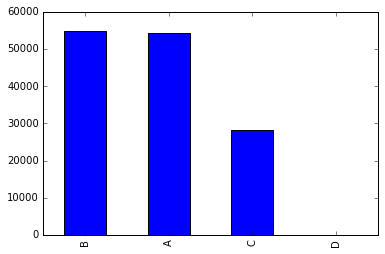

In [3]:
print(df['CancellationCode'].value_counts().reset_index(name='amount'))
df['CancellationCode'].value_counts().plot(kind='bar')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [4]:
result = df.groupby(['Origin','Dest'])['Year'].count().sort_values(ascending=False)
d=result.keys()[0]
print(d[0],'-',d[1])
df[(df['Origin'] == d[0]) & (df['Dest'] == d[1])].describe()

SFO - LAX


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [5]:
a=['CarrierDelay' ,'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for j in a:
    c=df[df[j]>0]['FlightNum'].value_counts().head(5)
   
    print('топ-5 рейсов', j ,':' ,*c.index)
    for i in range(5):
        name=c.index[i]
        с1=df[df['FlightNum']==name]['UniqueCarrier'].value_counts().index
        print('Рейс', name, "принадлежит (", *с1, ') ')
    print()

топ-5 рейсов CarrierDelay : 12 15 16 44 50
Рейс 12 принадлежит ( WN US B6 AS CO HA DL XE FL UA ) 
Рейс 15 принадлежит ( WN AS HA CO UA AA B6 XE FL DL US ) 
Рейс 16 принадлежит ( WN US B6 AS CO HA AA DL XE FL UA ) 
Рейс 44 принадлежит ( WN UA US HA AS DL B6 FL CO AQ ) 
Рейс 50 принадлежит ( WN CO DL US B6 FL XE UA ) 

топ-5 рейсов WeatherDelay : 539 449 648 549 653
Рейс 539 принадлежит ( WN AA F9 NW CO UA FL AS DL ) 
Рейс 449 принадлежит ( WN UA CO NW B6 FL F9 AA US DL ) 
Рейс 648 принадлежит ( NW UA WN US B6 AA DL AS CO FL ) 
Рейс 549 принадлежит ( UA NW FL CO HA WN AA DL ) 
Рейс 653 принадлежит ( NW F9 UA WN AA AS DL FL US ) 

топ-5 рейсов NASDelay : 75 321 701 378 15
Рейс 75 принадлежит ( US UA WN AS B6 AA FL DL ) 
Рейс 321 принадлежит ( US UA AA NW WN FL AS B6 CO XE DL ) 
Рейс 701 принадлежит ( WN UA AA DL NW US FL CO B6 ) 
Рейс 378 принадлежит ( AA WN CO HA B6 F9 AS FL UA NW US ) 
Рейс 15 принадлежит ( WN AS HA CO UA AA B6 XE FL DL US ) 

топ-5 рейсов SecurityDelay : 52 47 55 167 4

**Задание 5:** Определить, как распределено количество рейсов от времени дня?

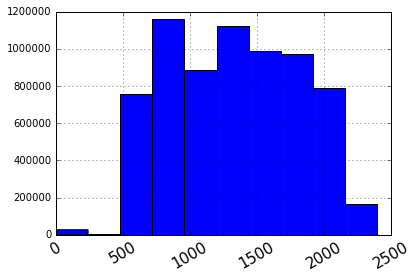

In [6]:
df['DepTime'].hist(xlabelsize=15,xrot=30)

plt.show()


,DepTime,amount
0,1,566
1,2,428
2,3,429
3,4,420
4,5,460
5,6,397
6,7,392
7,8,357
8,9,366
9,10,427


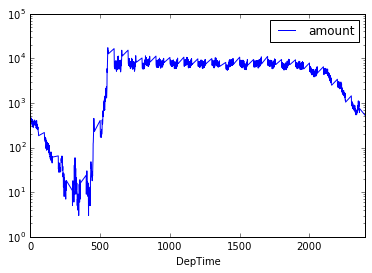

In [7]:
table=df.groupby('DepTime').size().reset_index(name='amount')
table.plot(x='DepTime',y='amount',logy=True)

table

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [8]:
season=df[['Month','DayofMonth']]
result=season.groupby(['Month','DayofMonth']).size().reset_index(name='3')
result.set_index(['Month','DayofMonth'])



3
Month DayofMonth       
1     1           19187
      2           20954
      3           20937
      4           20929
      5           18069
      6           19897
      7           20347
      8           19604
      9           19820
      10          20305
      11          20349
      12          16572
      13          18947
      14          20178
      15          19504
      16          19768
      17          20277
      18          20348
      19          16255
      20          18653
      21          20133
      22          19505
      23          19771
      24          20258
      25          20314
      26          16282
      27          18922
      28          20149
      29          19498
      30          19767
...                 ...
12    2           18166
      3           18019
      4           18350
      5           18405
      6           14440
      7           17116
      8           18301
      9           17600
      10          17917
      11          18377
      12          18433
      13          14459
      14          17137
      15          18317
      16          17631
      17          18294
      18          18746
      19          18828
      20          16216
      21          17725
      22          18665
      23          18633
      24          15263
      25          15288
      26          18640
      27          16593
      28          17696
      29          18540
      30          18538
      31          15748

[366 rows x 1 columns]

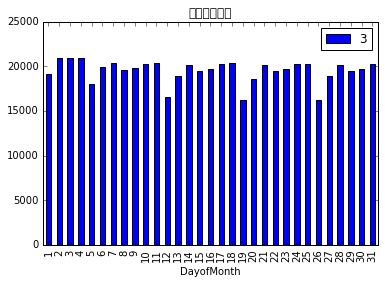

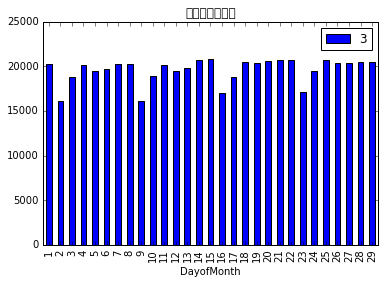

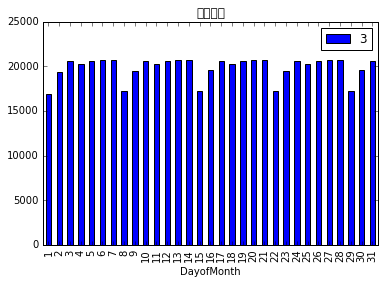

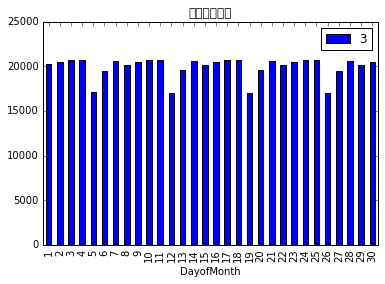

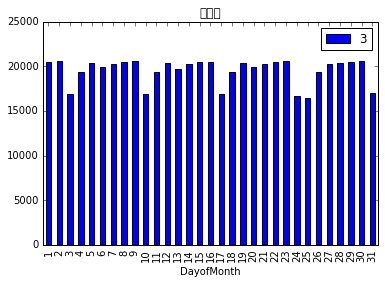

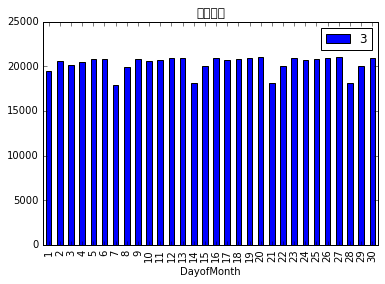

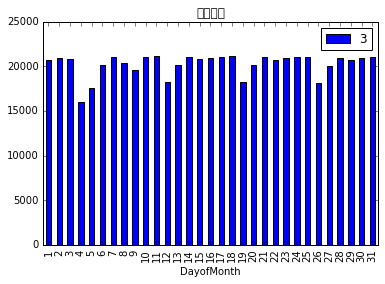

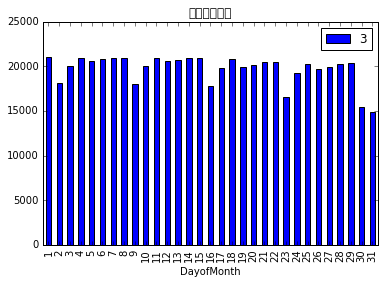

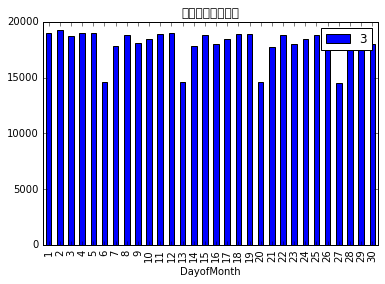

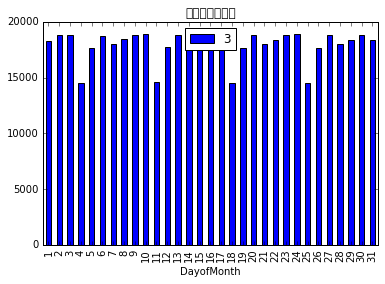

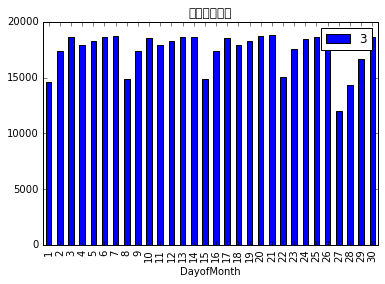

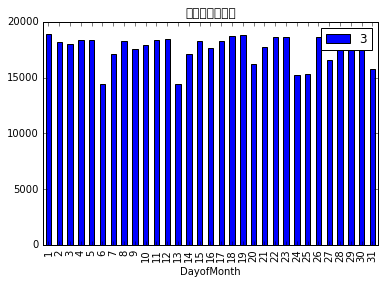

In [9]:
result
a=['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
for i in range(12):
    result[result['Month']==i+1].plot(x='DayofMonth',y='3',kind='bar',title=a[i])

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data1 = pd.read_csv('../data/table13.csv', sep = ',')
data2 = pd.read_csv('../data/table14.csv', sep = ',')

In [11]:
a1=data1['State'].unique()
a2=data2['State'].unique()
amount=(len(a1)-len(a2))
k=0
ar=[]
print('Совпадающие штаты:')
if amount>=0:
    for i in range(len(a1)):
        cc= data2['State'].isin(a1[i:(i+1)])
        b = cc.unique()
        if True in b:
            print(a1[i])
            k=k+1
        else:
            ar.append(a1[i])
else:
    for i in range(len(a2)):
        cc= data1['State'].isin(a2[i:(i+1)])
        b = cc.unique()
        if True in b:
            print(a2[i])
            k=k+1
        else:
            ar.append(a2[i])
print('не совпадают',*ar)


Совпадающие штаты:
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
New_Hampshire
New_Jersey
New_Mexico
New_York
North_Carolina
North_Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode_Island
South_Carolina
South_Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West_Virginia
Wisconsin
Wyoming
не совпадают DC Nevada


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [12]:
data1 = pd.read_csv('../data/table13.csv', sep = ',')
data2 = pd.read_csv('../data/table14.csv', sep = ',')
result = data1.append(data2)
result.head()

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska


In [13]:
data=data1.append(data2)
data=data[data1.columns]
data

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
5,Arizona,Cities,Apache Junction,1,0,0,0,0,0,0,1,0,0,NaN,"36,626"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [14]:
result.dropna()

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


In [15]:
#Удалилась вся таблица, так как в каждой строке было наличие хоть одного None

In [16]:
#Посмотрим на название колонок в двух таблицах
print('data1.columns-',list(data1.columns),end='\n')
print()
print('data2.columns-',list(data2.columns),end='\n')

data1.columns- ['State', 'Agency type', 'Agency name', 'Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter', '4th quarter', 'Population']

data2.columns- ['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4', 'Population']


In [17]:
#изменим название колонок в первой таблице
data1.columns=['State', 'Agency Type', 'Agency Name', 'Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability',
               'Gender', 'Gender Identity', 'Q1', 'Q2', 'Q3', 'Q4', 'Population']
print('data1.columns-',list(data1.columns))

data1.columns- ['State', 'Agency Type', 'Agency Name', 'Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability', 'Gender', 'Gender Identity', 'Q1', 'Q2', 'Q3', 'Q4', 'Population']


In [18]:
#некоторых колонок нет в таблице 2, поэтому, когда мы будем объединять таблицы, то получим значение None. Но этого можно избежать,
#создав новые колонки в таблице 2, со значением "not"
a=['Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability','Gender', 'Gender Identity']
for i in a:
    data2[i]='Not'
data2.head()

,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity
0,Alabama,Cities,Ashford,0,0,0,0,"2,177",Not,Not,Not,Not,Not,Not,Not
1,Alabama,Cities,Ashland,0,0,0,0,"1,926",Not,Not,Not,Not,Not,Not,Not
2,Alabama,Cities,Auburn,0,0,0,0,"57,970",Not,Not,Not,Not,Not,Not,Not
3,Alabama,Cities,Berry,NaN,0,NaN,NaN,"1,124",Not,Not,Not,Not,Not,Not,Not
4,Alabama,Cities,Childersburg,0,0,0,0,"5,111",Not,Not,Not,Not,Not,Not,Not


In [19]:
#теперь можем объединять таблицы
data=data1.append(data2)
data

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
5,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0,Arizona
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona


In [20]:
#удалим пропущенные значения
result=data.dropna()
result=result[['State', 'Agency Type', 'Agency Name', 'Race', 'Religion', 'Sexual orientation', 'Ethnicity', 'Disability',
               'Gender', 'Gender Identity', 'Q1', 'Q2', 'Q3', 'Q4', 'Population']]
result=result[result['Population']!=0]
result

,State,Agency Type,Agency Name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"
6,Arizona,Cities,Avondale,4,0,0,1,0,0,0,1,1,3,0,"78,905"
7,Arizona,Cities,Eagar,0,0,0,1,0,0,0,0,1,0,0,"5,034"
8,Arizona,Cities,El Mirage,1,0,0,0,0,0,0,0,0,1,0,"32,837"
9,Arizona,Cities,Gilbert,1,0,0,0,0,0,0,1,0,0,0,"225,232"
10,Arizona,Cities,Glendale,2,3,1,1,0,0,0,2,0,3,2,"234,006"


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [21]:
# Your code here..
result=result.sort_values(['State','Agency Type'])
result2=result.set_index(['State','Agency Type'])
result2

Agency Name  \
State   Agency Type                                                             
Alabama Cities                                                       Florence   
        Cities                                                         Hoover   
        Cities                                                     Prattville   
        Cities                                                     Tuscaloosa   
        Cities                                                        Ashford   
        Cities                                                        Ashland   
        Cities                                                         Auburn   
        Cities                                                   Childersburg   
        Cities                                                      Courtland   
        Cities                                                      Demopolis   
        Cities                                                       Eclectic   
        Cities                                                     Enterprise   
        Cities                                                          Eutaw   
        Cities                                                       Fairhope   
        Cities                                                          Foley   
        Cities                                                        Gadsden   
        Cities                                                         Geneva   
        Cities                                                   Guntersville   
        Cities                                                     Hanceville   
        Cities                                                     Huntsville   
        Cities                                                       Irondale   
        Cities                                                         Jasper   
        Cities                                                      Lafayette   
        Cities                                                   Level Plains   
        Cities                                                   Midland City   
        Cities                                                         Mobile   
        Cities                                                  Muscle Shoals   
        Cities                                                        Oneonta   
        Cities                                                            Opp   
        Cities                                                         Pelham   
...                                                                       ...   
Wyoming Cities                                                       Evanston   
        Cities                                                     Evansville   
        Cities                                                       Glenrock   
        Cities                                                    Green River   
        Cities                                                       Greybull   
        Cities                                                       Guernsey   
        Cities                                                          Hanna   
        Cities                                                         Hulett   
        Cities                                                       Kemmerer   
        Cities                                                         Lander   
        Cities                                                        Laramie   
        Cities                                                         Lovell   
        Cities                                                           Lusk   
        Cities                                                          Mills   
        Cities                                                      Moorcroft   
        Cities                                                      Newcastle   
        Cities                                                    Pine Bluffs   
        Cities  

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [22]:
result1=result[result['State'].isin(['Montana','Utah','Nevada'])]
result1=result1.set_index(['State','Agency Type'])
result1

Agency Name Race Religion  \
State   Agency Type                                                             
Montana Cities                                         Billings    5        1   
        Cities                                   Columbia Falls    1        0   
        Cities                                      Great Falls    1        0   
        Cities                                         Hamilton    0        1   
        Cities                                           Helena   11        0   
        Cities                                        Kalispell    2        0   
        Cities                                         Missoula    1        0   
        Cities                                            Baker  Not      Not   
        Cities                                         Belgrade  Not      Not   
        Cities                                          Boulder  Not      Not   
        Cities                                          Bozeman  Not      Not   
        Cities                                          Bridger  Not      Not   
        Cities                                         Colstrip  Not      Not   
        Cities                                         Columbus  Not      Not   
        Cities                                           Conrad  Not      Not   
        Cities                                         Cut Bank  Not      Not   
        Cities                                       Deer Lodge  Not      Not   
        Cities                                           Dillon  Not      Not   
        Cities                                      East Helena  Not      Not   
        Cities                                            Ennis  Not      Not   
        Cities                                           Eureka  Not      Not   
        Cities                                      Fort Benton  Not      Not   
        Cities                                          Glasgow  Not      Not   
        Cities                                         Glendive  Not      Not   
        Cities                                            Havre  Not      Not   
        Cities                                      Hot Springs  Not      Not   
        Cities                                           Joliet  Not      Not   
        Cities                                           Laurel  Not      Not   
        Cities                                        Lewistown  Not      Not   
        Cities                                            Libby  Not      Not   
...                                                         ...  ...      ...   
Utah    Cities                                            Ogden  Not      Not   
        Cities                                             Orem  Not      Not   
        Cities                                        Park City  Not      Not   
        Cities                                            Perry  Not      Not   
        Cities                                    Pleasant View  Not      Not   
        Cities                                        Riverdale  Not      Not   
        Cities                                            Salem  Not      Not   
        Cities                                           Salina  Not      Not   
        Cities                                            Sandy  Not      Not   
        Cities                                Santa Clara/Ivins  Not      Not   
        Cities                                 Santaquin/Genola  Not      Not   
        Cities                                 Saratoga Springs  Not      Not   
        Cities                                      South Ogden  Not      Not   
        Cities                                     Spanish Fork  Not      Not   
        Cities                                       Springdale  Not      Not   
        Cities                                         Stockton  Not      Not   
        Cities                                           Sunset  Not      Not   
  

In [23]:
a={}
pop=0

for row in result1.iterrows():
    pop=row[1]['Population']
    if ',' in pop:
        pop=pop.replace(',','')
        
        pop=round(int(pop))
    else:
        pop=int(pop)*1000
   
    k=list(row[0])
    state_cities=k[0]+' - '+k[1]
    res=a.get(state_cities)
    if res==None:
        a[state_cities]=pop
    else:
        a[state_cities]=round((pop+res),)

L=list(a.keys())
print('population')
for i in range(len(L)):
    print( L[i],':',a[L[i]])
 

population
Montana - Universities and Colleges : 29215
Montana - Cities : 5031552
Utah - Universities and Colleges : 140041
Utah - Cities : 3689058
Nevada - Cities : 1500455


## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [171]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data_frame = pd.read_csv('../data/accord_sedan_training.csv', sep = ',')
dat = data_frame.values
print(data_frame.columns.values)

matrix = np.zeros([len(dat), 2])
for i in range(len(dat)):
    matrix[i][0] = 1
    matrix[i][1] = dat[i][1]

Y_ar=list(data_frame['price'])
print(matrix, Y_ar ,sep='\n')

['price' 'mileage' 'year' 'trim' 'engine' 'transmission']
[[  1.00000000e+00   6.76970000e+04]
 [  1.00000000e+00   7.37380000e+04]
 [  1.00000000e+00   8.03130000e+04]
 [  1.00000000e+00   8.60960000e+04]
 [  1.00000000e+00   7.96070000e+04]
 [  1.00000000e+00   9.69660000e+04]
 [  1.00000000e+00   1.26150000e+05]
 [  1.00000000e+00   1.19255000e+05]
 [  1.00000000e+00   7.35130000e+04]
 [  1.00000000e+00   5.06490000e+04]
 [  1.00000000e+00   9.00000000e+04]
 [  1.00000000e+00   1.14340000e+05]
 [  1.00000000e+00   7.52700000e+04]
 [  1.00000000e+00   5.46850000e+04]
 [  1.00000000e+00   6.84800000e+04]
 [  1.00000000e+00   1.07290000e+05]
 [  1.00000000e+00   3.91440000e+04]
 [  1.00000000e+00   4.28930000e+04]
 [  1.00000000e+00   1.03650000e+05]
 [  1.00000000e+00   5.91000000e+04]
 [  1.00000000e+00   9.64040000e+04]
 [  1.00000000e+00   5.94660000e+04]
 [  1.00000000e+00   8.96920000e+04]
 [  1.00000000e+00   9.14860000e+04]
 [  1.00000000e+00   9.02560000e+04]
 [  1.00000000e+0

In [421]:
data_frame.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [172]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy.optimize as opt
import sympy

plt.style.use('ggplot')

%matplotlib inline

In [174]:
n = 30
b_0 = np.linspace(-3000, 3000, n)
b_1 = np.linspace(-1, 1, n)
X, Y = np.meshgrid(b_0,b_1)

L = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        #L[i][j] = X[i][j]**2 + Y[i][j]**2
        for k in range(len(Y_ar)):
            L[i][j] = L[i][j] + (X[i][j] + Y[i][j] * matrix[k][1] - Y_ar[k])**2
        L[i][j] = L[i][j] / (2*len(Y_ar))

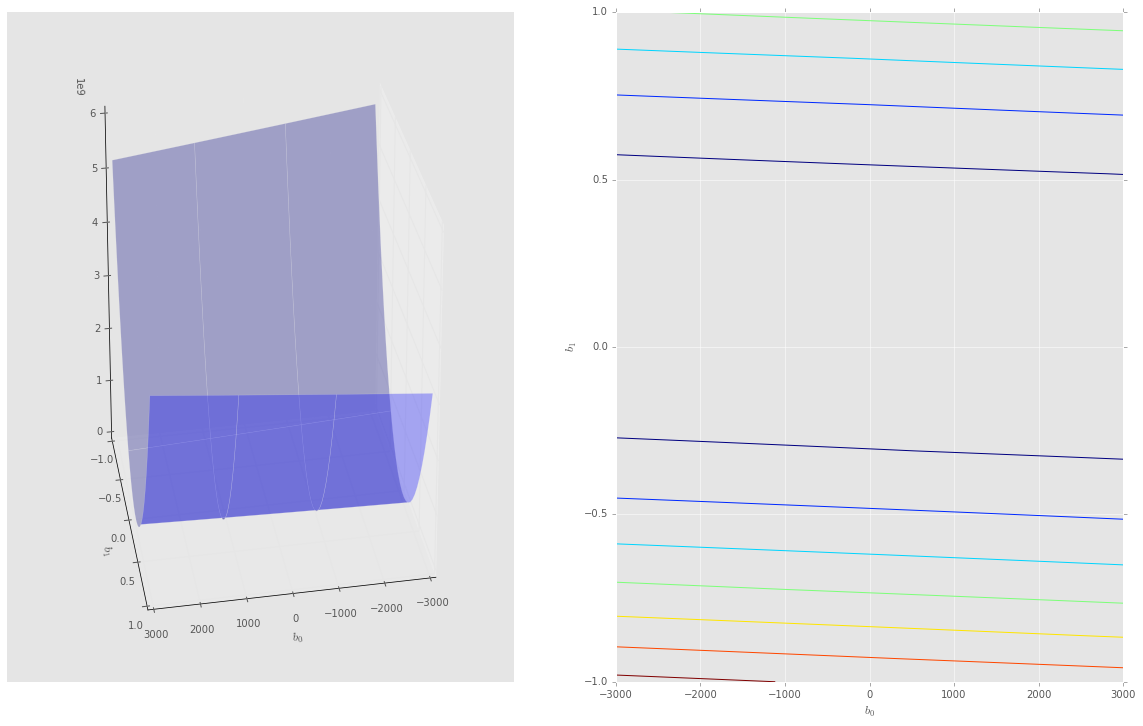

In [175]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(25,80)
ax.plot_surface(X, Y, L, alpha=0.3,)
ax.set_xlabel('$b_0$')
ax.set_ylabel('$b_1$')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(X, Y, L)
plt.clabel(contour, inline=15, fontsize=100)
ax.set_xlabel('$b_0$')
ax.set_ylabel('$b_1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [176]:
ccc=np.matrix(Y_ar).T
ccc.shape
xx=[]
for i in range(len(matrix)):
    xx.append(matrix[i][1])


In [201]:
b_0=1
b_1=1
a=0.001
n=9
b_value=[[0] for i in range(n)]
b=0
dL_0=0
dL_1=0
L=0
#for i in range (n):
    #print(matrix[i][1])
    #print(Y_ar[j])
for i in range (n):
    dL_0 = 0
    dL_1 = 0
    #ищем производные
    for j in range(len(Y_ar)):
                   dL_0=dL_0+(b_0 + b_1 * matrix[j][1] - Y_ar[j])
    res1=dL_0/len(Y_ar)
  
    for j in range(len(Y_ar)):   
                   dL_1=dL_1+(b_0 + b_1 * matrix[j][1] - Y_ar[j])*matrix[j][1]
    res2=dL_1/(len(Y_ar))
    b_0 = b_0 - a*res1
    b_1 = b_1 - (a*res2)
    a /= 2
    
    b_value[i]=(b_0,b_1)
    L = 0
print(b_value)


[(-76.642537170263793, -7673775.8095827345), (344267687.07557237, 33468823657345.02), (-750753727685847.75, -7.2986357069533274e+19), (8.1859397082952932e+20, 7.9581611980928528e+25), (-4.4628181639637406e+26, -4.3386376655828517e+31), (1.2165194309983452e+32, 1.182669073739505e+37), (-1.6580488410232572e+37, -1.6119126723841894e+42), (1.1299062385202368e+42, 1.0984659434716702e+47), (-3.8499148573384812e+46, -3.7427887481976891e+51)]


**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [202]:
b_value
#почему-то значения не сходтся...

[(-76.642537170263793, -7673775.8095827345),
 (344267687.07557237, 33468823657345.02),
 (-750753727685847.75, -7.2986357069533274e+19),
 (8.1859397082952932e+20, 7.9581611980928528e+25),
 (-4.4628181639637406e+26, -4.3386376655828517e+31),
 (1.2165194309983452e+32, 1.182669073739505e+37),
 (-1.6580488410232572e+37, -1.6119126723841894e+42),
 (1.1299062385202368e+42, 1.0984659434716702e+47),
 (-3.8499148573384812e+46, -3.7427887481976891e+51)]

In [203]:
#веса признаков

In [204]:
b0, b1 =b_value[-1]
x_l = np.arange(0, 160000, 1000)
y_l = x_l*(b1) +b0

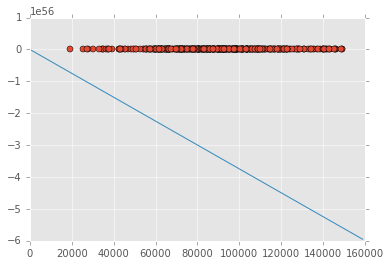

In [205]:
x = [matrix[i][1] for i in range(len(matrix))]
plt.plot(x, Y_ar, "o")
plt.plot(x_l, y_l)

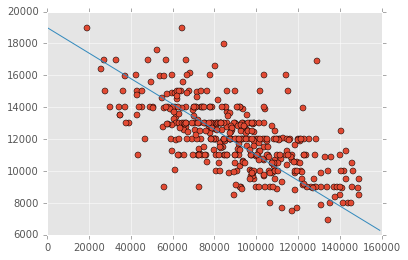

In [215]:
#получился некрасивый график, однако если бы b1=-0.08,b0=19000, то график был бы следующим
y_l = x_l*(-0.08) +19000
x = [matrix[i][1] for i in range(len(matrix))]
plt.plot(x, Y_ar, "o")
plt.plot(x_l, y_l)